# Lapton price prediction in phyton


The price of the laptop can be affected by several factors:

-What is the correlation between the laptop price and his features?

-Can we predict the price from the features?

In this problem we will train some Sklearn models using a train dataset and then we'll predict the price for the test dataset given.

The price is given in Indian rupee (INR).

## Data import and cleaning

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import regex as re
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


Import data from csv:

In [2]:
df_train=pd.read_csv("laptops_train.csv")
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48000
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48000
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40000
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20000


In [3]:
df_test=pd.read_csv("laptops_test.csv")
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.00000
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.00000
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.00000
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.00000
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.00000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


We can see a space in the storage name so we'll rename the column for both train and test dataset

In [5]:
df_train.rename(columns={" Storage":"Storage"}, inplace=True)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


In [7]:
df_test.rename(columns={" Storage":"Storage"}, inplace=True)

We can now check for any duplicates data in the train dataset

In [8]:
df_train.duplicated().unique()

array([False])

There are just unique values in the dataframe

In [9]:
df_train.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [10]:
df_train

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48000
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48000
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40000
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00000
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00000
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80000
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00000


We can see that some columns have more than one feature inside. So we need to clean data.

#### Screen

The screen column has three features inside: screen type, resolution and the touchscreen

In [11]:
df_train["Screen"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [12]:
def screen_features(df_train):
    #resolution extraction
    df_train["Resolution"]=df_train["Screen"].str.extract(r'(\d+x\d+)')
    #removing resolution from the screen column
    df_train["Screen"]=df_train["Screen"].replace(r'(\d+x\d+)','', regex=True)
    #extracing the touchscreen feature
    df_train["Touchscreen"]=df_train["Screen"].str.extract(r'(Touchscreen)')
    #replace touchscreen with 1
    df_train["Touchscreen"]=df_train["Touchscreen"].str.replace('Touchscreen', "1")
    df_train["Touchscreen"]=df_train["Touchscreen"].astype(float)
    #removing the touchscreen from the screen column
    df_train["Screen"]=df_train["Screen"].replace(r'(Touchscreen)','', regex=True)
    #removing spaces and slashes 
    df_train["Screen"]=df_train["Screen"].replace(r'(/)','', regex=True)
    df_train["Screen"]=df_train["Screen"].replace(r' ','', regex=True)
    df_train["Screen"]=df_train["Screen"].replace("", "NaN")
    return df_train

In [13]:
df_train=screen_features(df_train)

In [14]:
df_test=screen_features(df_test)

We can also remove the "" symbol from screen size column and set it as float

In [15]:
df_train["Screen Size"]=df_train["Screen Size"].str.replace('"',"")
df_test["Screen Size"]=df_test["Screen Size"].str.replace('"',"")
df_train["Screen Size"]=df_train["Screen Size"].astype(float)
df_test["Screen Size"]=df_test["Screen Size"].astype(float)

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    float64
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7   Storage                   325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
 13  Resolution                325 non-null    object 
 14  Touchscree

#### CPU

In [17]:
def cpu_features(df_train):
    #CPU frenquence extraction
    df_train["CPU_freq"]=df_train["CPU"].str.extract(r'(\d+(?:\.\d+)?GHz)')
    #removing GHz from the CPU frenquence column
    df_train["CPU_freq"]=df_train["CPU_freq"].replace('GHz', "", regex=True)
    #rename our CPU frenquence column and set as float 
    df_train.rename(columns={"CPU_freq":"CPU_freq (GHz)"}, inplace=True)
    df_train["CPU_freq (GHz)"]=df_train["CPU_freq (GHz)"].astype(float)
    #removing CPU frequence from CPU column
    df_train["CPU"]=df_train["CPU"].replace(r'(\d+(?:\.\d+)?GHz)', "", regex=True)
    return df_train


In [18]:
df_train=cpu_features(df_train)

In [19]:
df_test=cpu_features(df_test)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
 13  Resolution                977 non-null    object 
 14  Touchscree

#### Storage

In [21]:
df_train["Storage"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

In [22]:
def storage_features(df_train):
    df_train["Storage"]=df_train["Storage"].replace(('TB'),"000GB", regex=True)
    df_train["Storage1"]=df_train["Storage"].str.split("+").str[0]
    df_train["Storage2"]=df_train["Storage"].str.split("+").str[1]
    df_train["Storage_size1 (GB)"]=df_train["Storage1"].str.split("GB").str[0]
    df_train["Storage_type1"]=df_train["Storage1"].str.split("GB").str[1]
    df_train["Storage_type1"]=df_train["Storage_type1"].replace(" ", "", regex=True)
    df_train["Storage_size2 (GB)"]=df_train["Storage2"].str.split("GB").str[0]
    df_train["Storage_type2"]=df_train["Storage2"].str.split("GB").str[1]
    df_train["Storage_size2 (GB)"]=df_train["Storage_size2 (GB)"].replace(" ", "", regex=True)
    df_train["Storage_type2"]=df_train["Storage_type2"].replace(" ", "", regex=True)
    df_train["Storage_size2 (GB)"]=df_train["Storage_size2 (GB)"].astype(float)
    df_train["Storage_size1 (GB)"]=df_train["Storage_size1 (GB)"].astype(float)
    df_train=df_train.drop(['Storage1','Storage2','Storage'], axis=1)
    return df_train

In [23]:
df_train=storage_features(df_train)

In [24]:
df_test=storage_features(df_test)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   GPU                       977 non-null    object 
 8   Operating System          977 non-null    object 
 9   Operating System Version  841 non-null    object 
 10  Weight                    977 non-null    object 
 11  Price                     977 non-null    float64
 12  Resolution                977 non-null    object 
 13  Touchscreen               141 non-null    float64
 14  CPU_freq (

#### RAM

In [26]:
#check if the RAM is always in GB
df_train["RAM"].str.replace(r'(\d+)', "", regex=True).unique()

array(['GB'], dtype=object)

In [27]:
#check if the RAM is always in GB
df_train["RAM"].str.replace(r'(\d+)', "", regex=True).unique()

array(['GB'], dtype=object)

We can see that the RAM is always in GB so we can directly remore GB from the column

In [28]:
#removing GB from RAM column
df_train["RAM"]=df_train["RAM"].replace("GB", "", regex=True)
#set RAM column as float
df_train['RAM'] = df_train['RAM'].astype(float)
#rename RAM column
df_train.rename(columns={"RAM":"RAM (GB)"}, inplace=True)

In [29]:
#removing GB from RAM column
df_test["RAM"]=df_test["RAM"].replace("GB", "", regex=True)
#set RAM column as float
df_test['RAM'] = df_test['RAM'].astype(float)
#rename RAM column
df_test.rename(columns={"RAM":"RAM (GB)"}, inplace=True)

#### Weight

In [30]:
#check if the unit of measure of the weight column
df_train["Weight"].str.replace(r'(\d+|\.)', "", regex=True).unique()

array(['kg'], dtype=object)

In [31]:
#check if the RAM is always in GB
df_test["Weight"].str.replace(r'(\d+|\.)', "", regex=True).unique()

array(['kg', 'kgs'], dtype=object)

The unit of measure is given in kg or in kgs so we'll remove both the s and kg from the weight column

In [32]:
#removing kg and kgs from weight columns
df_train["Weight"]=df_train["Weight"].replace("kg|kgs", "", regex=True)
df_train["Weight"]=df_train["Weight"].replace("s", "", regex=True)
#set the weight column as type float
df_train['Weight'] = df_train['Weight'].astype(float)
#rename column
df_train.rename(columns={"Weight":"Weight (kg)"}, inplace=True)

In [33]:
#removing kg and kgs from weight columns
df_test["Weight"]=df_test["Weight"].replace("kg", "", regex=True)
df_test["Weight"]=df_test["Weight"].replace("s", "", regex=True)
#set the weight column as type float
df_test['Weight'] = df_test['Weight'].astype(float)
#rename column
df_test.rename(columns={"Weight":"Weight (kg)"}, inplace=True)

## Data analysis and visualization

In [34]:
#fill na values with "NaN"
df_train=df_train.fillna("NaN")
df_test=df_test.fillna("NaN")
#replace NaN with 0 for touchscreen and storage columns
df_train[["Touchscreen","Storage_size1 (GB)", "Storage_size2 (GB)"]]=df_train[["Touchscreen","Storage_size1 (GB)", "Storage_size2 (GB)"]].replace("NaN",0)
df_test[["Touchscreen","Storage_size1 (GB)", "Storage_size2 (GB)"]]=df_test[["Touchscreen","Storage_size1 (GB)", "Storage_size2 (GB)"]].replace("NaN",0)

To analyze our entire dataframe we can merge the train and test dataframe

In [35]:
df_list=[df_train,df_test]
df=pd.concat(df_list, ignore_index=True).reset_index(drop=True)

### Most frequent brand in the dataframe

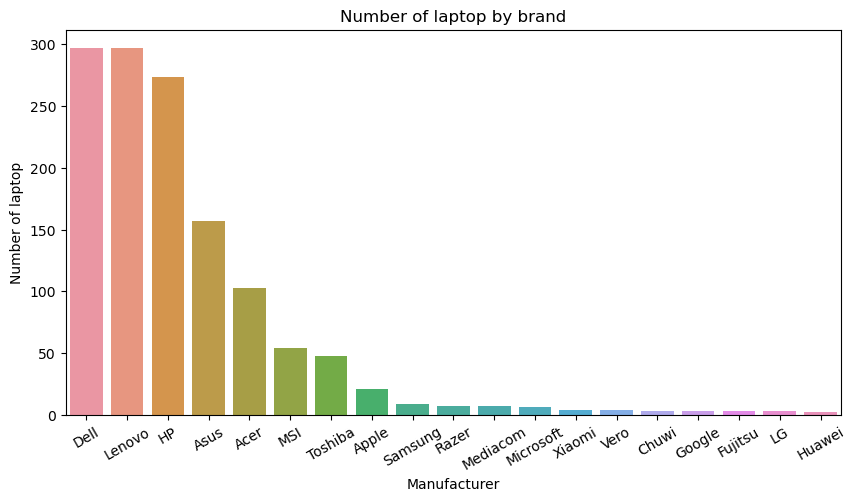

In [36]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.countplot(x = 'Manufacturer', data = df, order = df['Manufacturer'].value_counts().index)
ax.set_title("Number of laptop by brand")
plt.xticks(rotation=30)
ax.set(ylabel='Number of laptop')
plt.show()


### Average price by brand

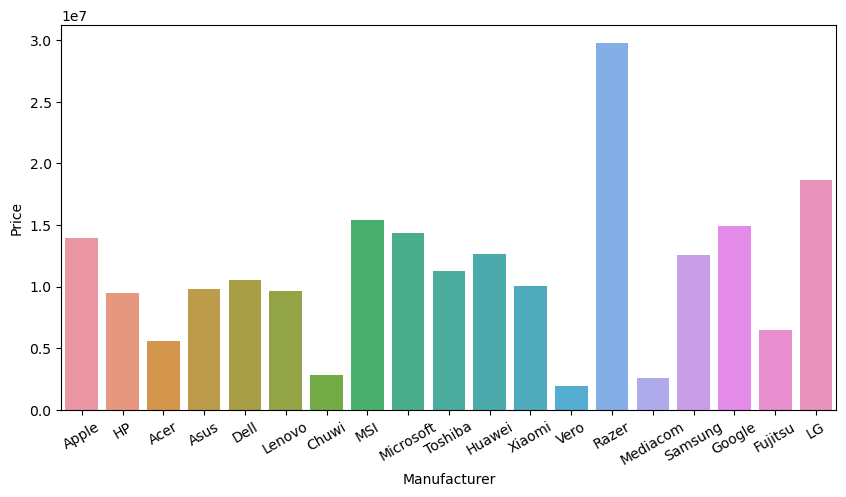

In [37]:
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(data=df, x="Manufacturer", y="Price", errorbar=('ci', False))
plt.xticks(rotation=30)
plt.show()

### Most frequent screen size

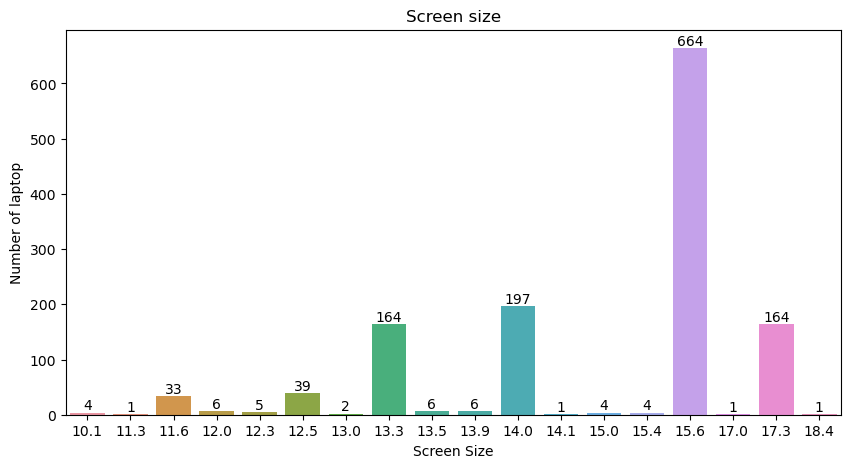

In [38]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(data=df, x="Screen Size")
ax.set_title("Screen size")
ax.bar_label(ax.containers[0])
ax.set(ylabel='Number of laptop')
plt.show()

### Most frequent RAM

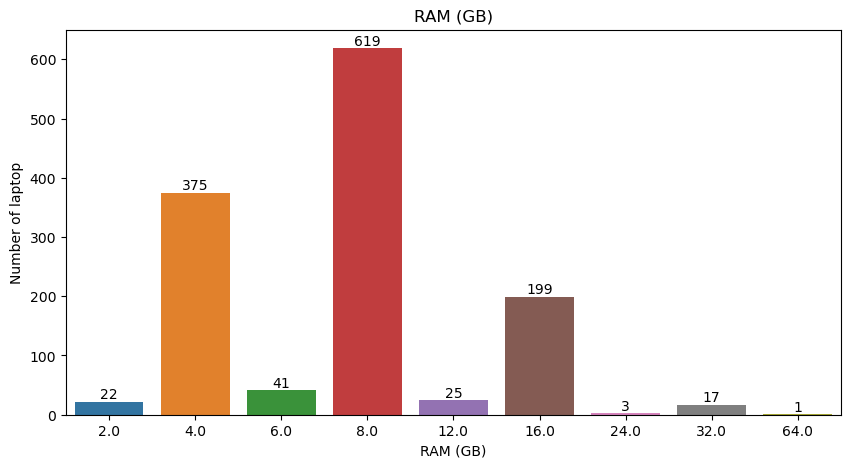

In [39]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(data=df, x="RAM (GB)")
ax.set_title("RAM (GB)")
ax.bar_label(ax.containers[0])
ax.set(ylabel='Number of laptop')
plt.show()

### Price distribution

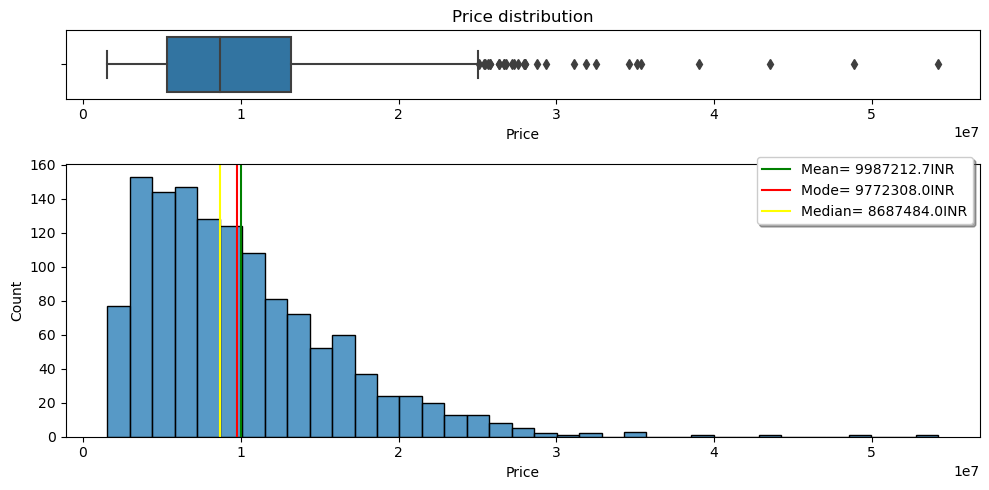

In [40]:
fig, ax=plt.subplots(2, 1, figsize=(10,5), gridspec_kw = {"height_ratios": (.2, .8)})
ax[0].set_title("Price distribution")
sns.boxplot(data=df, ax=ax[0], x="Price")
sns.histplot(data=df, ax=ax[1], x="Price")
plt.axvline(df["Price"].mean(), color='green', label="Mean= " + str(np.round(df["Price"].mean(),1))+ "INR")
plt.axvline(df["Price"].mode()[0], color='red', label="Mode= " + str(np.round(df["Price"].mode()[0],1))+ "INR")
plt.axvline(df["Price"].median(), color='yellow', label="Median= " + str(np.round(df["Price"].median(),1))+ "INR")
plt.legend(bbox_to_anchor = (1, 1.05), ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.tight_layout()
plt.show()


### Storage distribution

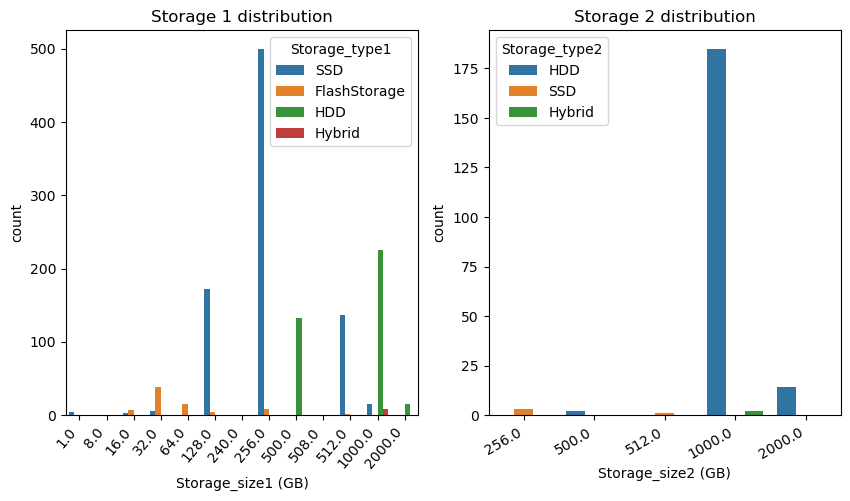

In [41]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("Storage 1 distribution")
ax[1].set_title("Storage 2 distribution")
#fig.autofmt_xdate(rotation=45)
sns.countplot(data=df, x="Storage_size1 (GB)", hue="Storage_type1", ax=ax[0])
sns.countplot(data=df[df["Storage_size2 (GB)"]>0], x="Storage_size2 (GB)", hue="Storage_type2", ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=50, ha='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha='right')
plt.show()

For the majority of the lapton the first storage is an SSD of little dimension (128/256/512 GB) and the second is HDD with larger dimension (1000 GB)

### Price vs Screen Size relation

Is there a relationship between the price and the screen size?

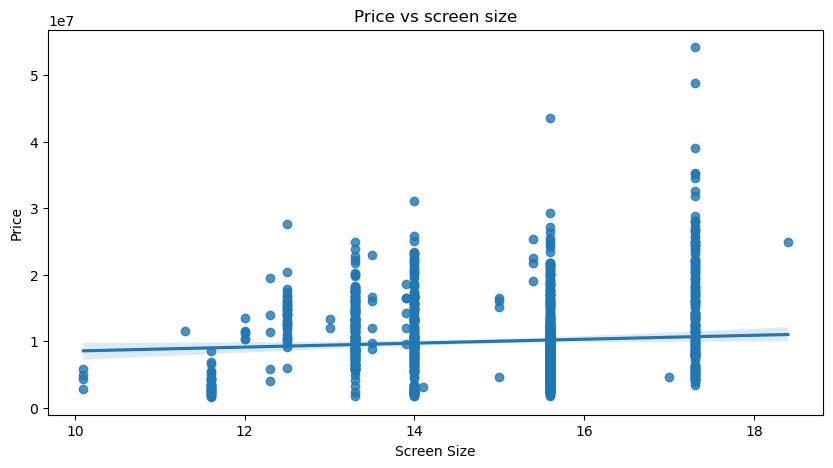

In [42]:
fig, ax=plt.subplots(figsize=(10,5))
sns.regplot(data=df, x="Screen Size", y="Price")
ax.set_title('Price vs screen size')
plt.show()

There is a minimum relation between the screen size and the price

### Price vs weight relation

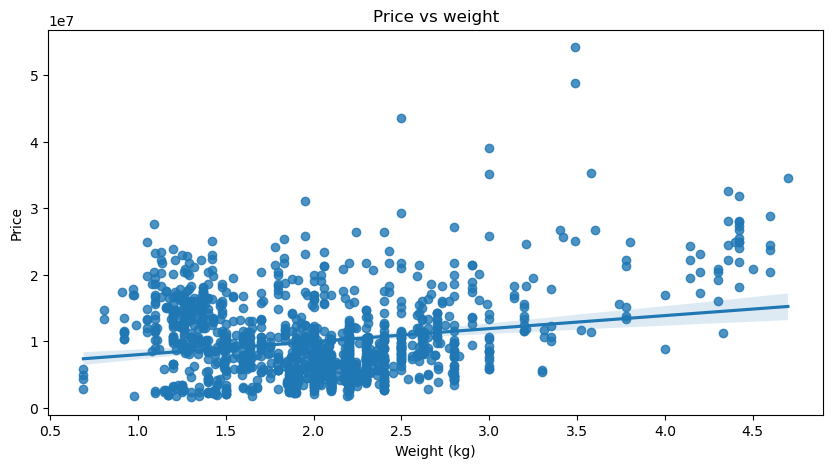

In [43]:
fig, ax=plt.subplots(figsize=(10,5))
sns.regplot(data=df, x="Weight (kg)", y="Price")
ax.set_title('Price vs weight')
plt.show()

There is a relation between the weight and the price, probably because better laptop have components like cpu and gpu that are usually heavier 

### Price vs Screen type

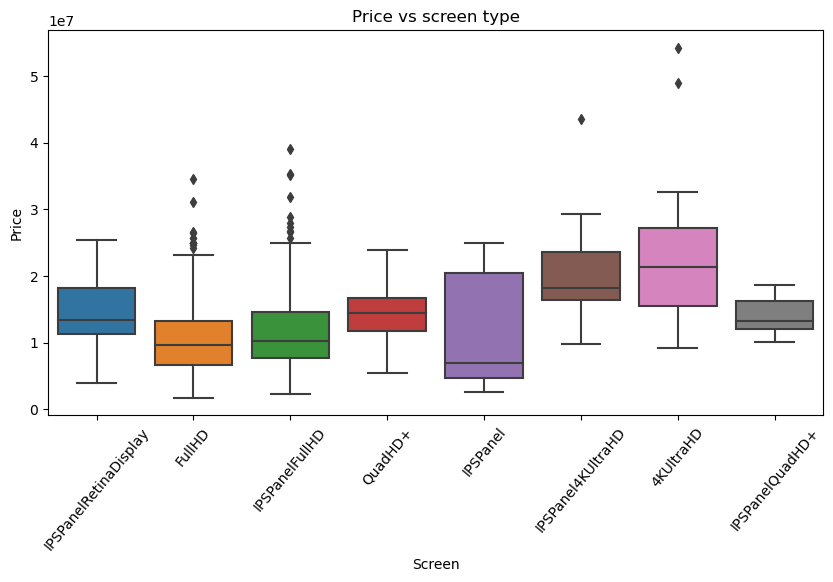

In [44]:
fig, ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df[df["Screen"]!="NaN"], x="Screen", y="Price")
ax.set_title('Price vs screen type')
plt.xticks(rotation=50)
plt.show()

### Price vs CPU and GPU brand

In [45]:
df["CPU brand"]=df["CPU"].str.split(" ").str[0]
df["GPU brand"]=df["GPU"].str.split(" ").str[0]

In [46]:
df["CPU brand"].value_counts()

Intel      1239
AMD          62
Samsung       1
Name: CPU brand, dtype: int64

In [47]:
df["GPU brand"].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: GPU brand, dtype: int64

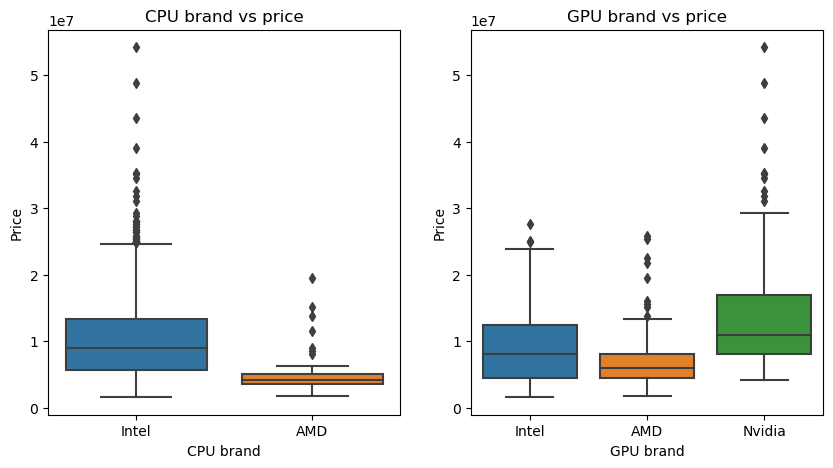

In [48]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("CPU brand vs price")
ax[1].set_title("GPU brand vs price")
sns.boxplot(x="CPU brand", y="Price", data=df[(df["GPU brand"]!="ARM")&(df["CPU brand"]!="Samsung")], ax=ax[0])
sns.boxplot(x="GPU brand", y="Price", data=df[(df["GPU brand"]!="ARM")&(df["CPU brand"]!="Samsung")], ax=ax[1])
plt.show()

Intel CPU and Nvidia GPU lead to more expensive laptop prices.

### Category vs price

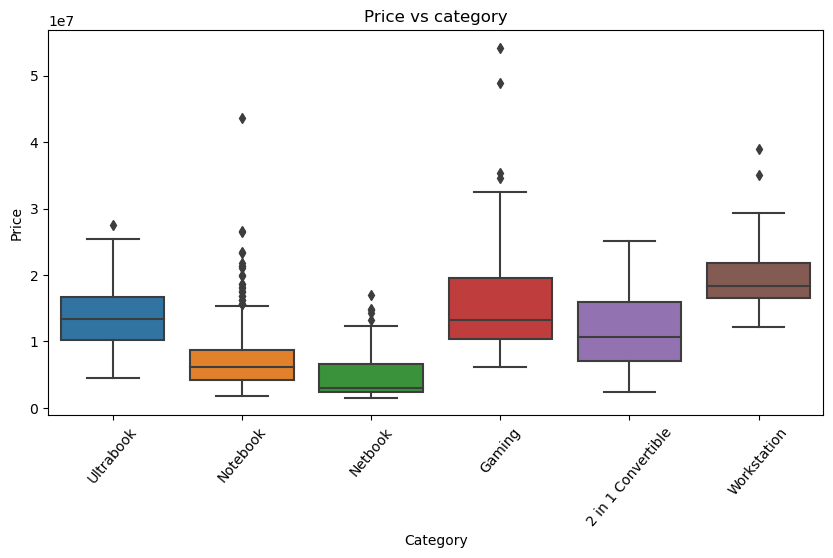

In [49]:
fig, ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df[df["Category"]!="NaN"], x="Category", y="Price")
ax.set_title('Price vs category')
plt.xticks(rotation=50)
plt.show()

### Most 10 expensive laptop

In [50]:
df_top10=df.groupby("Model Name")["Price"].max().sort_values(ascending=False).head(10)

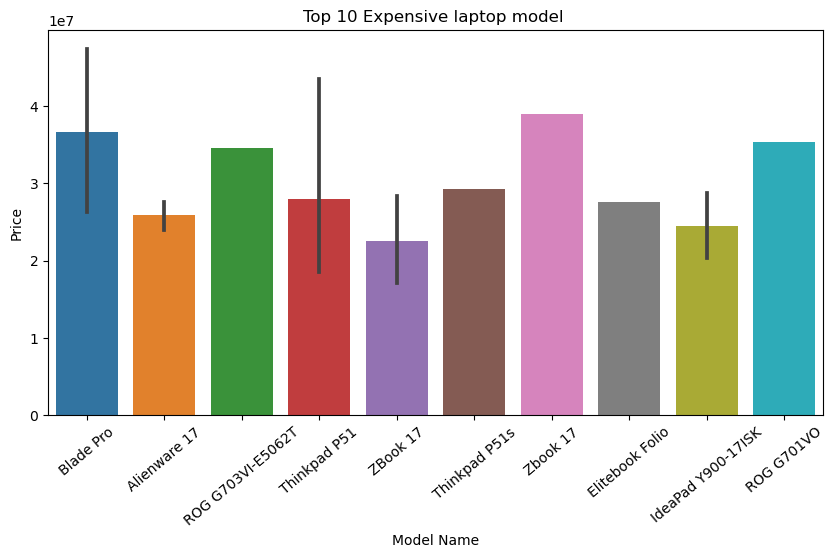

In [51]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df[df["Model Name"].isin(df_top10.index)], x="Model Name", y="Price" )
plt.xticks(rotation=40)
ax.set_title("Top 10 Expensive laptop model ")
plt.show()

### Top 10 CPU that make the laptop be more expensive

In [52]:
df_CPUtop10=df.groupby("CPU")["Price"].max().sort_values(ascending=False).head(10)

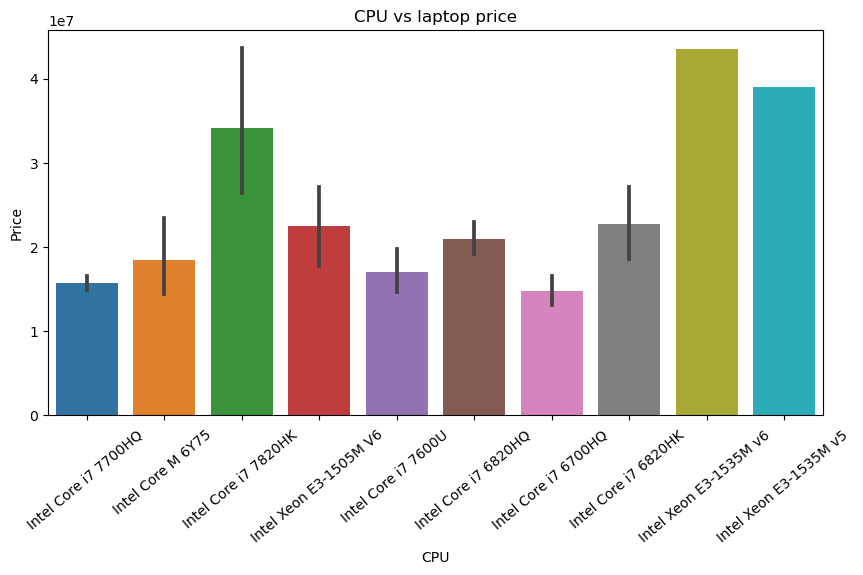

In [53]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df[df["CPU"].isin(df_CPUtop10.index)], x="CPU", y="Price")
plt.xticks(rotation=40)
ax.set_title("CPU vs laptop price")
plt.show()

As easily predictable the laptop with Intel Core i7 or Xeon E3 are the most expensive

### Top 10 CPU that make the laptop be more expensive

In [54]:
df_GPUtop10=df.groupby("GPU")["Price"].max().sort_values(ascending=False).head(10)

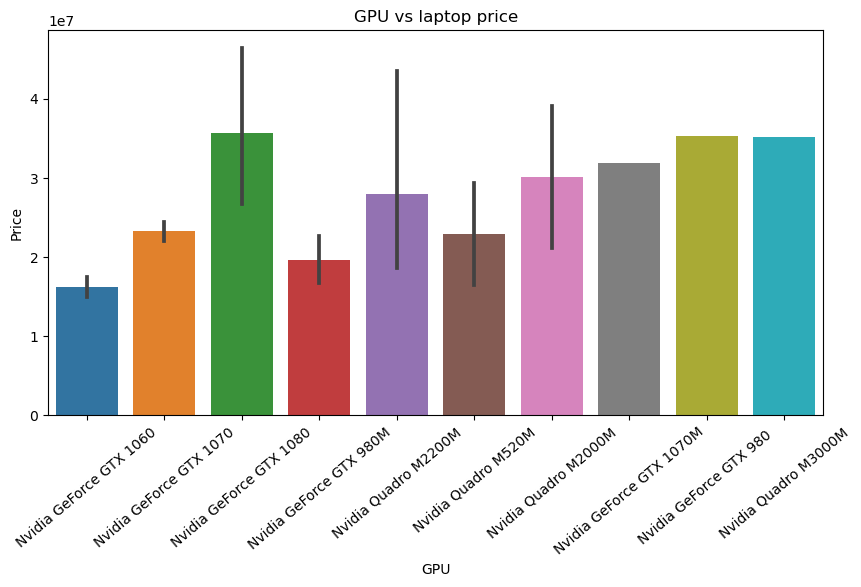

In [55]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df[df["GPU"].isin(df_GPUtop10.index)], x="GPU", y="Price")
plt.xticks(rotation=40)
ax.set_title("GPU vs laptop price")
plt.show()

Nvidia is the market leader of GPU market and the lapton with top Nvidia GPU are the most expensive

### Correlation between numerical columns

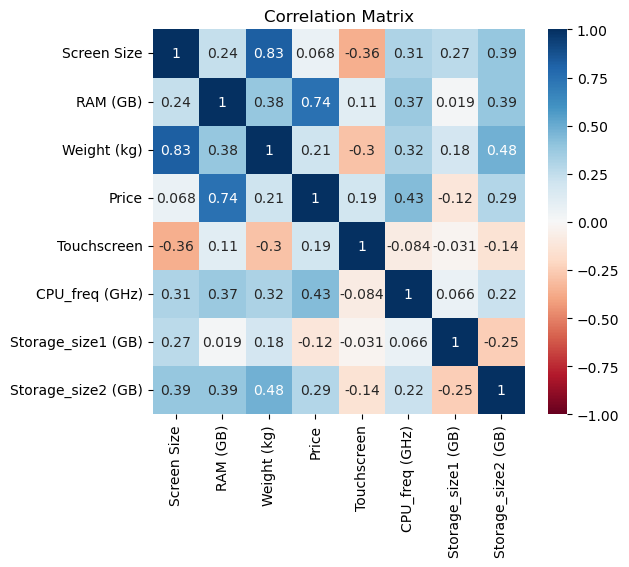

In [56]:
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(numeric_only = True), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

Inside numerical attributes, the price seems to be affected from the RAM. Cpu frequence and storage size have a low correlation in this graph because there are not the storage type and the type of CPU (some pc have more core with lower frequences).
We can also notice an high correlation between screen size and weight (obviously). 

## Maching learning model prediction

### Preparing the model and the dataset

Look at the dataframe columns

In [57]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM (GB)', 'GPU', 'Operating System',
       'Operating System Version', 'Weight (kg)', 'Price', 'Resolution',
       'Touchscreen', 'CPU_freq (GHz)', 'Storage_size1 (GB)', 'Storage_type1',
       'Storage_size2 (GB)', 'Storage_type2', 'CPU brand', 'GPU brand'],
      dtype='object')

We can exclude CPU and GPU brand because is already indirectly included in their columns

In [58]:
df=df.drop(columns=["CPU brand", "GPU brand"], axis=1)

We can now convert our non numerical columns with the label encoder function

In [59]:
c=['Manufacturer', 'Model Name', 'Category', 'Screen',
       'CPU', 'GPU', 'Operating System',
       'Operating System Version', 'Resolution',
       'Storage_type1', 'Storage_type2']
label_pc=LabelEncoder()
for column in c:
    df[column]=label_pc.fit_transform(df[column])


So we obtained a completely numeric dataframe

In [60]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),GPU,Operating System,Operating System Version,Weight (kg),Price,Resolution,Touchscreen,CPU_freq (GHz),Storage_size1 (GB),Storage_type1,Storage_size2 (GB),Storage_type2
0,1,300,4,13.30000,6,51,8.00000,58,6,3,1.37000,11912523.48000,10,0.00000,2.30000,128.00000,3,0.00000,2
1,1,301,4,13.30000,7,51,8.00000,51,6,3,1.34000,7993374.48000,1,0.00000,1.80000,128.00000,0,0.00000,2
2,7,50,3,15.60000,1,57,8.00000,53,4,3,1.86000,5112900.00000,3,0.00000,2.50000,256.00000,3,0.00000,2
3,1,300,4,15.40000,6,65,16.00000,9,6,3,1.83000,22563005.40000,12,0.00000,2.70000,512.00000,3,0.00000,2
4,1,300,4,13.30000,6,51,8.00000,59,6,3,1.37000,16037611.20000,10,0.00000,3.10000,256.00000,3,0.00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,10,579,0,14.00000,4,66,4.00000,47,5,0,1.80000,5673096.00000,3,1.00000,2.50000,128.00000,3,0.00000,2
1298,10,587,0,13.30000,5,66,16.00000,47,5,0,1.30000,13329108.00000,13,1.00000,2.50000,512.00000,3,0.00000,2
1299,10,196,3,14.00000,7,31,2.00000,40,5,0,1.50000,2036268.00000,0,0.00000,1.60000,64.00000,0,0.00000,2
1300,7,2,3,15.60000,7,66,6.00000,21,5,0,2.19000,6793488.00000,0,0.00000,2.50000,1000.00000,1,0.00000,2


We can now divide the price column from the other columns

In [61]:
X=df.drop("Price", axis=1)
y=df["Price"]
print(X.shape, y.shape)

(1302, 18) (1302,)


With the function train test split we'll create a train and a test dataframe

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state=0)

In order to compare the different model we'll use a dataframe to store the main informazione (Score R^2 train and test, mean absolute errore and root mean squared error)

In [63]:
summary=pd.DataFrame(index=["Score train", "Score test", "MAE", "RSME"])

In [64]:
def model(ModelType, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    ModelType.fit(X_train, y_train)
    train_score=ModelType.score(X_train,y_train)
    test_score=ModelType.score(X_test,y_test)
    pred=ModelType.predict(X_test).round(0)
    mae= mean_absolute_error(y_test, pred)
    rmse= np.sqrt(mean_squared_error(y_test, pred)) 
    print("Train:" , train_score)
    print("Test:" , test_score)
    print("Mean absolute error:" , mae)
    print("Root mean square error:" , rmse)
    return [train_score, test_score, mae, rmse ]
    

### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression


In [66]:
linear=LinearRegression()
summary["Linear Regression"]=model(ModelType=linear)

Train: 0.7280339738525258
Test: 0.6604898691863328
Mean absolute error: 2655506.3483969467
Root mean square error: 4053738.9924850008


### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dtree= DecisionTreeRegressor()
summary["Decision Tree Regression"]=model(ModelType=dtree)

Train: 0.999605475688436
Test: 0.8055515619039963
Mean absolute error: 1846781.5181679388
Root mean square error: 3067832.4837725195


### Random forest regression 

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
forest=RandomForestRegressor()
summary["Random Forest Regression"]=model(ModelType=forest)

Train: 0.9787964267206363
Test: 0.8609277716671053
Mean absolute error: 1674374.125801527
Root mean square error: 2594475.7637291127


### KNN regressor

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn=KNeighborsRegressor(n_neighbors=4)
summary["K Neighbors regressor"]=model(ModelType=knn)

Train: 0.8097184288776877
Test: 0.5737083870019795
Mean absolute error: 2651223.7703816793
Root mean square error: 4542373.115328421


### Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor


In [74]:
gradient = GradientBoostingRegressor(n_estimators=125)
summary["Gradient Boosting Regressor"]=model(ModelType=gradient)

Train: 0.9450684855225369
Test: 0.877009931607637
Mean absolute error: 1639569.14870229
Root mean square error: 2439857.360691913


### AdaBoostRegressor

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
ada= AdaBoostRegressor(n_estimators=15, learning_rate=1.0)
summary["Ada Boost Regressor"]=model(ModelType=ada)

Train: 0.7508403482735022
Test: 0.7314846292161834
Mean absolute error: 2778450.330076336
Root mean square error: 3605072.4173739725


### ExtraTreesRegressor

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
extra= ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.7,
                            bootstrap=True,
                            max_features=0.5,
                            max_depth=15)
summary["Extra Trees Regressor"]=model(ModelType=extra)

Train: 0.9545349933656598
Test: 0.8175155753800988
Mean absolute error: 1895056.2833587783
Root mean square error: 2971955.5597166107


### Model comparation

We can now compare every model to see the most accurate

In [79]:
summary

,Linear Regression,Decision Tree Regression,Random Forest Regression,K Neighbors regressor,Gradient Boosting Regressor,Ada Boost Regressor,Extra Trees Regressor
Score train,0.72803,0.99961,0.97880,0.80972,0.94507,0.75084,0.95453
Score test,0.66049,0.80555,0.86093,0.57371,0.87701,0.73148,0.81752
MAE,2655506.34840,1846781.51817,1674374.12580,2651223.77038,1639569.14870,2778450.33008,1895056.28336
RSME,4053738.99249,3067832.48377,2594475.76373,4542373.11533,2439857.36069,3605072.41737,2971955.55972


From our analysis, the gradient boosting regressor seems to be the best prediction model due the highest R2. The random forest regressor is also a good prediction model for our dataframe.

### Price prediction

We can now calculate the price prediction for out test dataframe:

In [80]:
X_test

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),GPU,Operating System,Operating System Version,Weight (kg),Resolution,Touchscreen,CPU_freq (GHz),Storage_size1 (GB),Storage_type1,Storage_size2 (GB),Storage_type2
580,12,414,3,14.00000,4,35,4.00000,43,5,0,1.45000,3,0.00000,1.10000,32.00000,3,0.00000,2
1017,16,446,3,14.00000,4,52,8.00000,47,5,0,1.47000,3,0.00000,2.30000,256.00000,3,0.00000,2
761,4,283,4,12.50000,1,75,16.00000,53,5,0,1.18000,3,0.00000,2.80000,256.00000,3,0.00000,2
686,7,50,3,15.60000,7,57,4.00000,6,5,0,1.86000,0,0.00000,2.50000,500.00000,1,0.00000,2
186,4,576,3,15.60000,0,77,16.00000,75,5,0,2.06000,14,1.00000,2.80000,512.00000,3,0.00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,417,4,13.30000,4,73,8.00000,53,5,0,1.11000,3,1.00000,2.70000,256.00000,3,0.00000,2
897,7,363,3,15.60000,1,73,8.00000,69,5,0,2.04000,3,0.00000,2.70000,1000.00000,1,0.00000,2
1128,7,311,1,17.30000,4,54,8.00000,79,5,0,3.35000,3,0.00000,2.30000,128.00000,3,1000.00000,0
762,6,331,4,12.30000,7,63,8.00000,52,1,3,1.10000,8,1.00000,1.20000,256.00000,3,0.00000,2


Using the index of our test dataframe we'll create a new dataframe with the given price and the prediction of all the models

In [81]:
index=X_test.index
prediction=pd.DataFrame(index=index)

In [83]:
prediction["Given Value"]=y_test
prediction["Linear Predicted Value"]=linear.predict(X_test).round(0)
prediction["Dtree Predicted Value"]=dtree.predict(X_test).round(0)
prediction["Forest Predicted Value"]=forest.predict(X_test).round(0)
prediction["Knn Predicted Value"]=knn.predict(X_test).round(0)
prediction["Gradient Predicted Value"]=gradient.predict(X_test).round(0)
prediction["Ada Predicted Value"]=ada.predict(X_test).round(0)
prediction["Extra Predicted Value"]=extra.predict(X_test).round(0)

In [84]:
prediction

,GivenValue,LinearPredictedValue,DtreePredictedValue,ForestPredictedValue,KnnPredictedValue,GradientPredictedValue,AdaPredictedValue,ExtraPredictedValue
580,3458988.00000,5029262.00000,3281148.00000,3228813.00000,2471976.00000,4143930.00000,5291766.00000,3572146.00000
1017,13249080.00000,10635011.00000,11275056.00000,12117096.00000,10806003.00000,11256594.00000,12083237.00000,10835096.00000
761,16530228.00000,17589259.00000,11372868.00000,14959197.00000,14240205.00000,15945019.00000,16544653.00000,15762247.00000
686,5447328.12000,3836461.00000,4312620.00000,4782902.00000,4140738.00000,5310419.00000,5793498.00000,5161065.00000
186,21314124.00000,22019362.00000,18027819.00000,18739116.00000,16660096.00000,19296478.00000,17103906.00000,19367231.00000
...,...,...,...,...,...,...,...,...
995,11995308.00000,13536641.00000,11915280.00000,13949823.00000,12773336.00000,14707806.00000,14146826.00000,14459175.00000
897,8002800.00000,10043691.00000,8705268.00000,8650848.00000,9132084.00000,9554076.00000,10823962.00000,8408431.00000
1128,10039068.00000,10069893.00000,8883108.00000,12248770.00000,9327708.00000,11640209.00000,12083237.00000,11523578.00000
762,13862628.00000,11072960.00000,10661508.00000,12261995.00000,10858466.00000,13104397.00000,14146826.00000,13413572.00000


### Export model and result on Excel

We can finally export the prediction and the summary datasets in an Excel file

In [85]:
with pd.ExcelWriter('PricePrediction.xlsx') as writer:
  prediction.to_excel(writer, sheet_name="Prediction", index=True)
  summary.to_excel(writer, sheet_name="QualityModel", index=True)
